In [1]:
# Import Dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Read CSV file
df = pd.read_csv('crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Check number of values of coins traded vs not.
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [4]:
# Filter out coins not being traded.
df = df[df['IsTrading'] == True]
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
# Delete 'IsTrading' column
df = df.drop('IsTrading', axis = 1)
df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Remove all rows that have at least one null value
df = df.dropna(axis=0, how="any")
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [7]:
# Sort Values to ID negative and values less than 0
df['TotalCoinsMined'].sort_values()

1200   -5.917978e+09
784     0.000000e+00
156     0.000000e+00
544     0.000000e+00
533     0.000000e+00
            ...     
1052    9.955311e+10
783     1.430067e+11
769     1.630551e+11
210     1.840668e+11
1234    9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [8]:
# Remove negative values and values with less than 0
df = df.loc[df['TotalCoinsMined'] > 0 ]
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [9]:
# Rename 'Unamed:0' column to Ticker
df.rename(columns={'Unnamed: 0':'Ticker'}, inplace=True)
df

,Ticker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Remove the 'Ticker' column
df = df.drop(['Ticker'], axis=1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0


In [11]:
# Remove the 'CoinName' column
df = df.drop(['CoinName'], axis=1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [12]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data with get_dummies()
dumDF = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
dumDF.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(dumDF.shape)

(532, 98)


In [14]:
# Standardize dataset so that columns that contain larger values do not unduly influence the outcome.
scaledDF = MinMaxScaler().fit_transform(dumDF)
print(scaledDF)

[[0.00000000e+00 4.20000000e-11 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.06585544e-03 5.32000000e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.95755135e-02 3.14159265e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.90135079e-04 1.40022261e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.37028150e-06 2.10000000e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.29582282e-07 1.00000000e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [15]:
# Data Dimensionality Reduction with PCA
pca = PCA(n_components = .90)
principalComponents = pca.fit_transform(scaledDF)
principalComponents.shape

(532, 28)

In [16]:
# Comparison between change of Features
print(f'Scaled Dataframe Shape: {scaledDF.shape}')
print(f'PCA Shape: {principalComponents.shape}')

Scaled Dataframe Shape: (532, 98)
PCA Shape: (532, 28)


In [17]:
# Further reduce the dataset dimensions with t-SNE 
tsne = TSNE()
tsneFeatures = tsne.fit_transform(principalComponents)
tsneFeatures.shape

C:\Users\asori\anaconda3\envs\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\asori\anaconda3\envs\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

In [18]:
(532, 2)
print(f'Scaled Dataframe Shape: {scaledDF.shape}')
print(f't-SNE Shape: {tsneFeatures.shape}')

Scaled Dataframe Shape: (532, 98)
t-SNE Shape: (532, 2)


In [19]:
# Plot t-SNE features
X = tsneFeatures[:,0]
y = tsneFeatures[:,1]

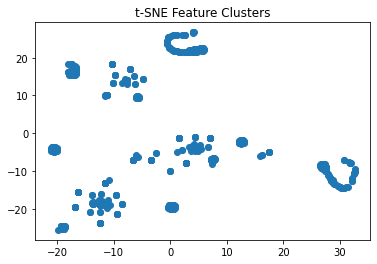

In [20]:
# Display scatter plot
plt.scatter(X,y)
plt.title("t-SNE Feature Clusters")
plt.show()

In [21]:
# Identify cluster with k-means
inertia = []
k = list(range(1,10))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principalComponents)
    inertia.append(kmeans.inertia_)

C:\Users\asori\anaconda3\envs\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


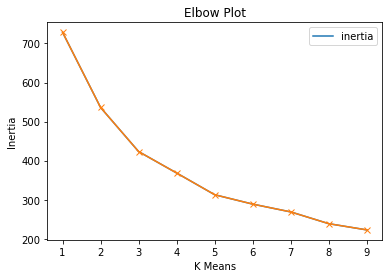

In [22]:
# Display Elbow plot
elbow_df = pd.DataFrame({"k": k, "inertia": inertia})
elbow_df.plot.line(x="k", y="inertia")
plt.xlabel("K Means")
plt.ylabel("Inertia")
plt.title("Elbow Plot")
plt.plot(k , inertia, marker = 'x')

plt.show()

Based on my findings, I believe grouping into 5 clusters works best with this data.